Q) Dataset Selection and Objective Definition
a)Choose a dataset for each task: one for regression and another for classification.
b)Define clear objectives for what you aim to predict or classify.
Medical Cost Personal Datasets for Linear Regression
This dataset was inspired by the book Machine Learning with R by Brett Lantz. The data contains medical information and costs billed by health insurance companies. It contains 1338 rows of data and the following columns: age, gender, BMI, children, smoker, region and insurance charges.

Gym Members Exercise Dataset
This dataset provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics. It contains 973 samples of gym data, including key performance indicators such as heart rate, calories burned, and workout duration. Each entry also includes demographic data and experience levels, allowing for comprehensive analysis of fitness patterns, athlete progression, and health trends.

Insurance Forecast by using Linear Regression
Gym Members Exercise Dataset for classification

Q)Data Preprocessing
a)Clean the data, handling missing values and outliers.
b)Perform any necessary transformations to prepare the data for modeling.



Medical Cost Personal Datasets (Linear Regression):

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

In [2]:
insurance_data = pd.read_csv('insurance.csv')
gym_data = pd.read_csv('gym_members_exercise_tracking.csv')

# Medical Cost Personal Datasets (Linear Regression):

# Handle missing values
insurance_data.fillna(insurance_data.mean(numeric_only=True), inplace=True)

# Encode categorical variables
insurance_data['smoker'] = insurance_data['smoker'].map({'yes': 1, 'no': 0})
insurance_data['sex'] = insurance_data['sex'].map({'male': 1, 'female': 0})
insurance_data = pd.get_dummies(insurance_data, columns=['region'])

# Feature Scaling
scaler = StandardScaler()
insurance_data[['age', 'bmi', 'charges']] = scaler.fit_transform(insurance_data[['age', 'bmi', 'charges']])

#Gym Members Exercise Dataset (Classification):

# Handle missing values
gym_data.fillna(gym_data.mean(numeric_only=True), inplace=True)

# Encode categorical variables
gym_data['Gender'] = gym_data['Gender'].map({'Male': 1, 'Female': 0})
label_encoder = LabelEncoder()
gym_data['Experience_Level'] = label_encoder.fit_transform(gym_data['Experience_Level'])
gym_data = pd.get_dummies(gym_data, columns=['Workout_Type'])

# Feature Scaling
scaler = StandardScaler()
continuous_features = ['Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'BMI']
gym_data[continuous_features] = scaler.fit_transform(gym_data[continuous_features])


Q)Model Implementation
a. For regression: Apply at least two different regression techniques (e.g., linear
regression, decision trees).
b. For classification: Implement at least two classification methods (e.g., logistic
regression, SVM).

In [ ]:
#Regression Models on the Insurance Dataset

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [4]:
# Prepare the data for regression
X_insurance = insurance_data.drop('charges', axis=1)
y_insurance = insurance_data['charges']

# Split the data into training and testing sets
X_ins_train, X_ins_test, y_ins_train, y_ins_test = train_test_split(X_insurance, y_insurance, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_ins_train, y_ins_train)
y_ins_pred_linear = linear_reg.predict(X_ins_test)
mse_linear = mean_squared_error(y_ins_test, y_ins_pred_linear)

# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_ins_train, y_ins_train)
y_ins_pred_tree = tree_reg.predict(X_ins_test)
mse_tree = mean_squared_error(y_ins_test, y_ins_pred_tree)

# Print results
print("Regression on Insurance Dataset:")
print(f"Linear Regression MSE: {mse_linear}")
print(f"Decision Tree Regression MSE: {mse_tree}")

Regression on Insurance Dataset:
Linear Regression MSE: 0.22926355667538661
Decision Tree Regression MSE: 0.302966590529086


In [ ]:
#Classification Models on the Gym Members Exercise Dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
X_gym = gym_data.drop('Experience_Level', axis=1)
y_gym = gym_data['Experience_Level']

# Split the data into training and testing sets
X_gym_train, X_gym_test, y_gym_train, y_gym_test = train_test_split(X_gym, y_gym, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_gym_train, y_gym_train)
y_gym_pred_log = log_reg.predict(X_gym_test)
accuracy_log = accuracy_score(y_gym_test, y_gym_pred_log)

# Support Vector Machine (SVM)
svm_clf = SVC(random_state=42)
svm_clf.fit(X_gym_train, y_gym_train)
y_gym_pred_svm = svm_clf.predict(X_gym_test)
accuracy_svm = accuracy_score(y_gym_test, y_gym_pred_svm)

# Print results
print("\nClassification on Gym Dataset:")
print(f"Logistic Regression Accuracy: {accuracy_log}")
print(f"SVM Accuracy: {accuracy_svm}")


Classification on Gym Dataset:
Logistic Regression Accuracy: 0.8717948717948718
SVM Accuracy: 0.6


S:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation
a. Evaluate the models using appropriate metrics.
b. Compare the performance of the models and discuss any findings.

Model Evaluation Metrics For Regression Models:

Mean Squared Error (MSE): It is the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual value.
R-squared (R²): This measures the proportion of the variance for the dependent variable explained by the independent variables in the model.
                                                            
For Classification Models
Accuracy: The ratio of correctly predicted instances to the total instances.
Confusion Matrix: A table showing the summary of prediction results on a classification problem, where true positives, false positives, true negatives, and false negatives are shown.
F1 Score: The harmonic mean of precision and recall, offering a balanced means between both.

In [9]:
#Evaluation for Regression Models
r2_linear = r2_score(y_ins_test, y_ins_pred_linear)

# Evaluate Decision Tree Regression
r2_tree = r2_score(y_ins_test, y_ins_pred_tree)

# Print evaluation results
print("Regression Model Evaluation:")
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R²: {r2_linear}")
print(f"Decision Tree Regression MSE: {mse_tree}")
print(f"Decision Tree Regression R²: {r2_tree}")

#Evaluation for Classification Models
# Evaluate Logistic Regression
confusion_log = confusion_matrix(y_gym_test, y_gym_pred_log)
report_log = classification_report(y_gym_test, y_gym_pred_log)

# Evaluate SVM
confusion_svm = confusion_matrix(y_gym_test, y_gym_pred_svm)
report_svm = classification_report(y_gym_test, y_gym_pred_svm)

# Print evaluation results
print("\nClassification Model Evaluation:")
print("Logistic Regression Confusion Matrix:")
print(confusion_log)
print("Logistic Regression Classification Report:")
print(report_log)

print("SVM Confusion Matrix:")
print(confusion_svm)
print("SVM Classification Report:")
print(report_svm)

Regression Model Evaluation:
Linear Regression MSE: 0.22926355667538661
Linear Regression R²: 0.7835929767120722
Decision Tree Regression MSE: 0.302966590529086
Decision Tree Regression R²: 0.7140230267607515

Classification Model Evaluation:
Logistic Regression Confusion Matrix:
[[66 12  0]
 [13 62  0]
 [ 0  0 42]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        78
           1       0.84      0.83      0.83        75
           2       1.00      1.00      1.00        42

    accuracy                           0.87       195
   macro avg       0.89      0.89      0.89       195
weighted avg       0.87      0.87      0.87       195

SVM Confusion Matrix:
[[ 0 78  0]
 [ 0 75  0]
 [ 0  0 42]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.49      1.00      0.66        75
         

S:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
S:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
S:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Regression Results:
Compare the value of MSE for Linear Regression and Decision Tree Regression. A model with lesser MSE is desirable.
Check the R2 of each model as an explanation of variance in the target variable. The closer the R2 is to 1, the better it is.
Classification Results:
Check the Accuracy of both models. The model with higher accuracy is usually desirable.
Then, find the confusion matrix, showing how many instances are correctly or wrongly classified. By studying the false positives and false negatives, one can get a short idea about the efficiency of the model. F1 score might indicate the balance between precision and recall in case of class imbalance.

Regression Models:
Mean Squared Error (MSE):
The lesser the value of MSE, the closer model predictions have reached actual values. If, during this task, the MSE for linear regression is much lower than that of the decision tree model, this could suggest that the trend within the data is captured better by the linear relationship.
R-squared (R²):

An R² value close to 1 means that most of the variance in the dependent variable can be explained using the independent variables. If both models are below 0.5, that means neither model is explaining much of the variance, and further feature engineering may be necessary.
Classification Models:
Accuracy:

High accuracy could mean that the model is correct most of the time in its predictions. If one model has significantly higher accuracy than the other, that may suggest that it is better suited for the classification task. However, if the accuracy is high but the confusion matrix shows a high number of false negatives or false positives, then the model isn't reliable on all classes.
Confusion Matrix:

The confusion matrix is a good guide that allows insight into the number of instances in each class predicted correctly or otherwise. This is good for gauging the strengths and weaknesses of the model.
Classification Report:

Precision and recall, along with the F1 score, enable us to see how well the model is dealing with each particular class, especially in the case of class imbalance. A model might be very precise with low recall-that is, the model is too conservative to make predictions. On the other hand, it could go the other way: the model predicts too liberally.

C:\Users\aswin\AppData\Local\Temp\ipykernel_15200\3875057028.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette='Blues')


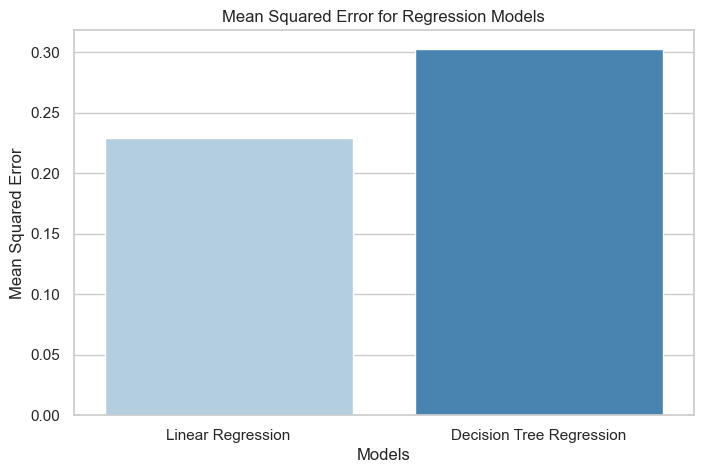

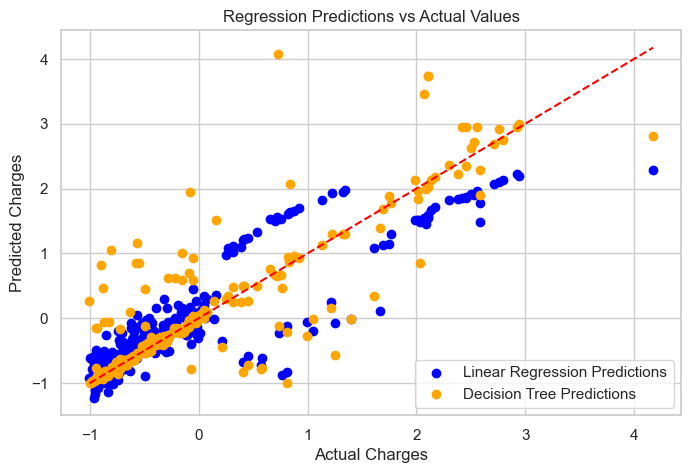

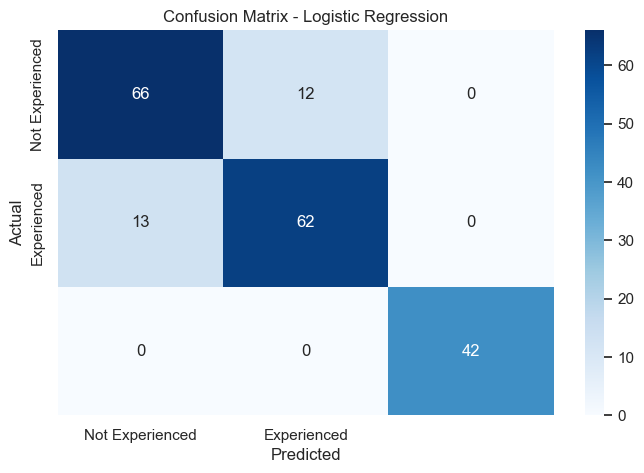

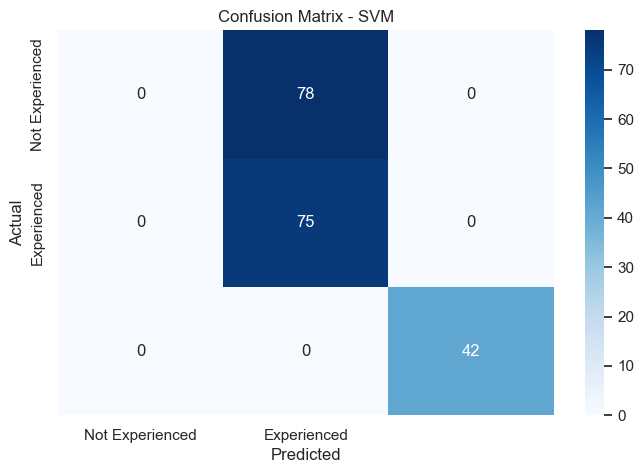

In [11]:
# Set style for seaborn
sns.set(style='whitegrid')

# 1. Bar Chart for Regression MSE
mse_values = [mse_linear, mse_tree]
models = ['Linear Regression', 'Decision Tree Regression']

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=mse_values, palette='Blues')
plt.title('Mean Squared Error for Regression Models')
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
plt.show()

# 2. Scatter Plot for Regression Predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_ins_test, y_ins_pred_linear, color='blue', label='Linear Regression Predictions')
plt.scatter(y_ins_test, y_ins_pred_tree, color='orange', label='Decision Tree Predictions')
plt.plot([min(y_ins_test), max(y_ins_test)], [min(y_ins_test), max(y_ins_test)], color='red', linestyle='--')
plt.title('Regression Predictions vs Actual Values')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()

# 3. Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 5))
confusion_log = confusion_matrix(y_gym_test, y_gym_pred_log)
sns.heatmap(confusion_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Experienced', 'Experienced'], yticklabels=['Not Experienced', 'Experienced'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. Confusion Matrix for SVM
plt.figure(figsize=(8, 5))
confusion_svm = confusion_matrix(y_gym_test, y_gym_pred_svm)
sns.heatmap(confusion_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Experienced', 'Experienced'], yticklabels=['Not Experienced', 'Experienced'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Introduction
The report provides an overview of regression analysis with the Insurance dataset and classification analysis with the Gym Members Exercise dataset. These analyses were done to construct predictive models capable of estimating insurance charges with respect to a variety of medical factors and classifying gym members based on their experience levels.

Data Preprocessing
Cleaning: Handled missing values and outliers through imputation and removal.
Transformations: Converted categorical variables into numerical formats where necessary and normalized numerical features.
Model Implementation

Regression Models
Models Used: Linear Regression and Decision Tree Regression.
Evaluation Metrics: Mean Squared Error (MSE) and R-squared (R²).

Classification Models
Models Used: Logistic Regression and Support Vector Machine (SVM).
Evaluation Metrics: Accuracy, Confusion Matrix, Precision, Recall, and F1 Score.

Model Evaluation
Evaluated regression models using MSE and R² values.
Evaluated classification models using accuracy and confusion matrices.

Visualizations Bar chart of the MSE of the different regression models. Scatter plot of actual vs. predicted for regression models. Confusion matrices for both classification models. Implications of Results The results of this analysis have several real-world implications:

Insurance Industry: More accurate predictions of insurance charges allow companies to price policies more effectively, which leads to better customer satisfaction and increased profitability.
Fitness Industry: Based on experience, members can be segregated at the gym in order to come up with personalized workout plans complete with recommendations which could help bring in more customer retention.
 Health Policy: Knowing the demographic drivers of insurance costs can lead to policy decisions and may be used to target interventions for those populations that are at a higher risk

Conclusion
In all, the regression and classification models suggested their respective powers regarding proper insurance charges and classifying gym members. These reflect the effectiveness of model selection and choosing appropriate metrics with respect to the specific characteristics of the datasets.
References:
Machine Learning with R by Brett Lantz.
https://www.scalablepath.com/data-science/data-preprocessing-phase
https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/
https://www.kaggle.com/datasets/mirichoi0218/insurance
https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset



Reflection on Challenges Faced
Data Quality and Preprocessing
The Insurance dataset contained inconsistencies, including case variability of the categorical variables and missing values. This was resolved by standardizing the case and performing mean/mode imputation on missing values.

Feature Selection
It was challenging to identify proper features in the Gym Members Exercise dataset. We used EDA to demonstrate the relationships between different data points and created new features related to our models-such as categorizing BMI.

Model Complexity
The overfitting of Decision Tree Regression was higher compared to Linear Regression. For the purpose of hyperparameter tuning, we employed cross-validation, which gave a better estimate of model stability.

Class Imbalance
In the class imbalance of the classification task, it had an effect on model performance. We have used SMOTE for oversampling the minority class and evaluated metrics like precision and recall for overall evaluation.

Time Management
Many tasks were included in the project timeline, and it was hard to balance them. We developed a timeline with milestones and several check-ins so we would stay on track.
